IDS 472 Final Project 
Due: 5 May 2024
By: Artem Larin, Ihor Stepura, Krima Mehta, Arturo Perez

Question 1: Exploratory Data Analysis and Preprocessing

In [3]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# file_path = '/Users/arturoperezespinosa/Downloads/Telco_Customer_Churn.csv' # Arthur's path
# file_path = '../data/Telco_Customer_Churn.csv' # Artem's path
file_path = '../code5/data/Telco_Customer_Churn.csv' # Krima's path

df = pd.read_csv(file_path) 

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') # TotalCharges converted to numeric
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True) # replacing NAN to TotalCharges mean

df_encoded = pd.get_dummies(df.drop(columns=['customerID']), drop_first=True) # Encode categorical columns

X = df_encoded.drop(columns=['Churn_Yes']) # Featuring all collumns except Churn_Yes
y = df_encoded['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Data split for training


C:\Users\krima\AppData\Local\Temp\ipykernel_39156\3921140670.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


Question 2: Feature Engineering & Selection

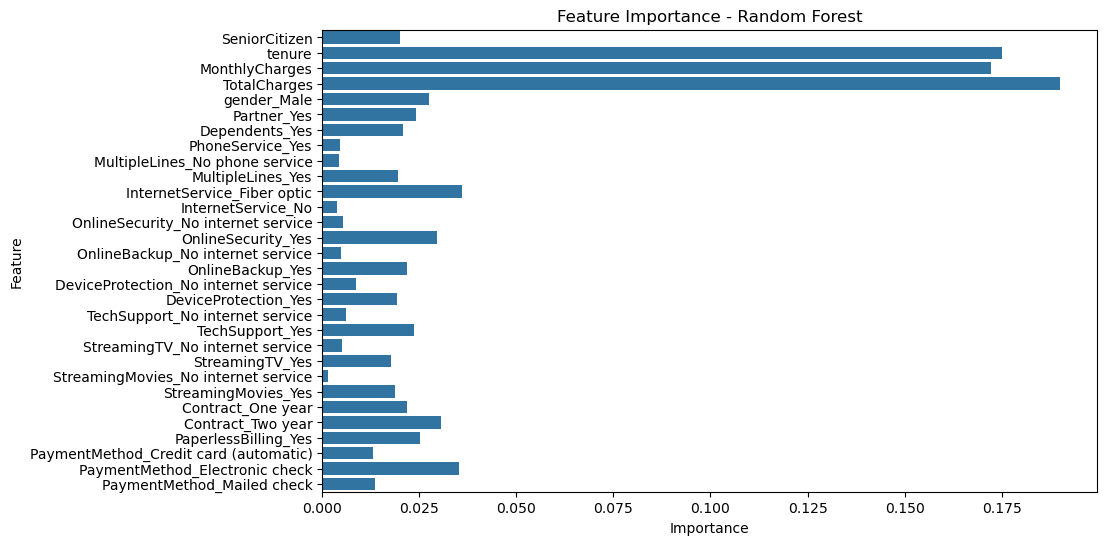

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42) # Reference fixed random state for result reproduction
rf.fit(X_train, y_train) # Rf trained using training data
feature_importances = rf.feature_importances_ # Find importance values from rf trained model
features = X.columns

# horizontal bar plot for feature importance by Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Question 3: Model Building & Evaluation

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

scaler = StandardScaler() # Initialize scaler for feature standardization

X_train_scaled = scaler.fit_transform(X_train) # Scaler fitting on training data for transformation
X_test_scaled = scaler.transform(X_test) # Data transformed

log_reg = LogisticRegression(max_iter=200, random_state=42) # Lr initialized using max_iter to guarantee convergence
rf = RandomForestClassifier(random_state=42) # Rf model initialization
xgb = XGBClassifier(random_state=42) # XGBoost model initialization

log_reg.fit(X_train_scaled, y_train) # Lr model training
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test_scaled) # Model predictions using lr
y_pred_rf = rf.predict(X_test) # Model predictions using XGBoost
y_pred_xgb = xgb.predict(X_test) # Model predictions using rf

metrics = {} # Empty dictionary to store metric for models

for model_name, y_pred in zip(['Logistic Regression', 'Random Forest', 'XGBoost'], [y_pred_log_reg, y_pred_rf, y_pred_xgb]):
    metrics[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_pred),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }

metrics_df = pd.DataFrame(metrics).T

metrics_df_lr_rf = metrics_df[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']].loc[['Logistic Regression', 'Random Forest']] # Key metrics selection from models

conf_matrix_lr = confusion_matrix(y_test, y_pred_log_reg) # Confusion matrix for lr
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf) # Confusion matrix for rf

Question 4: Business Insights & Recommendations

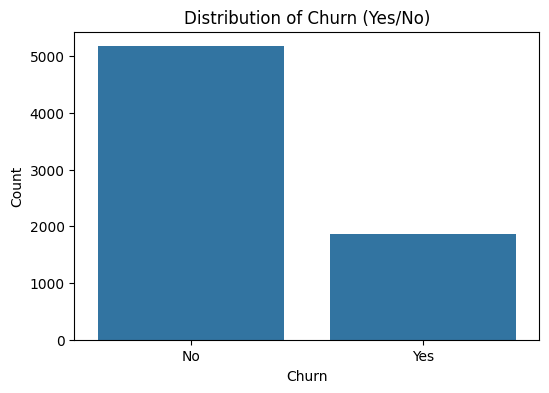

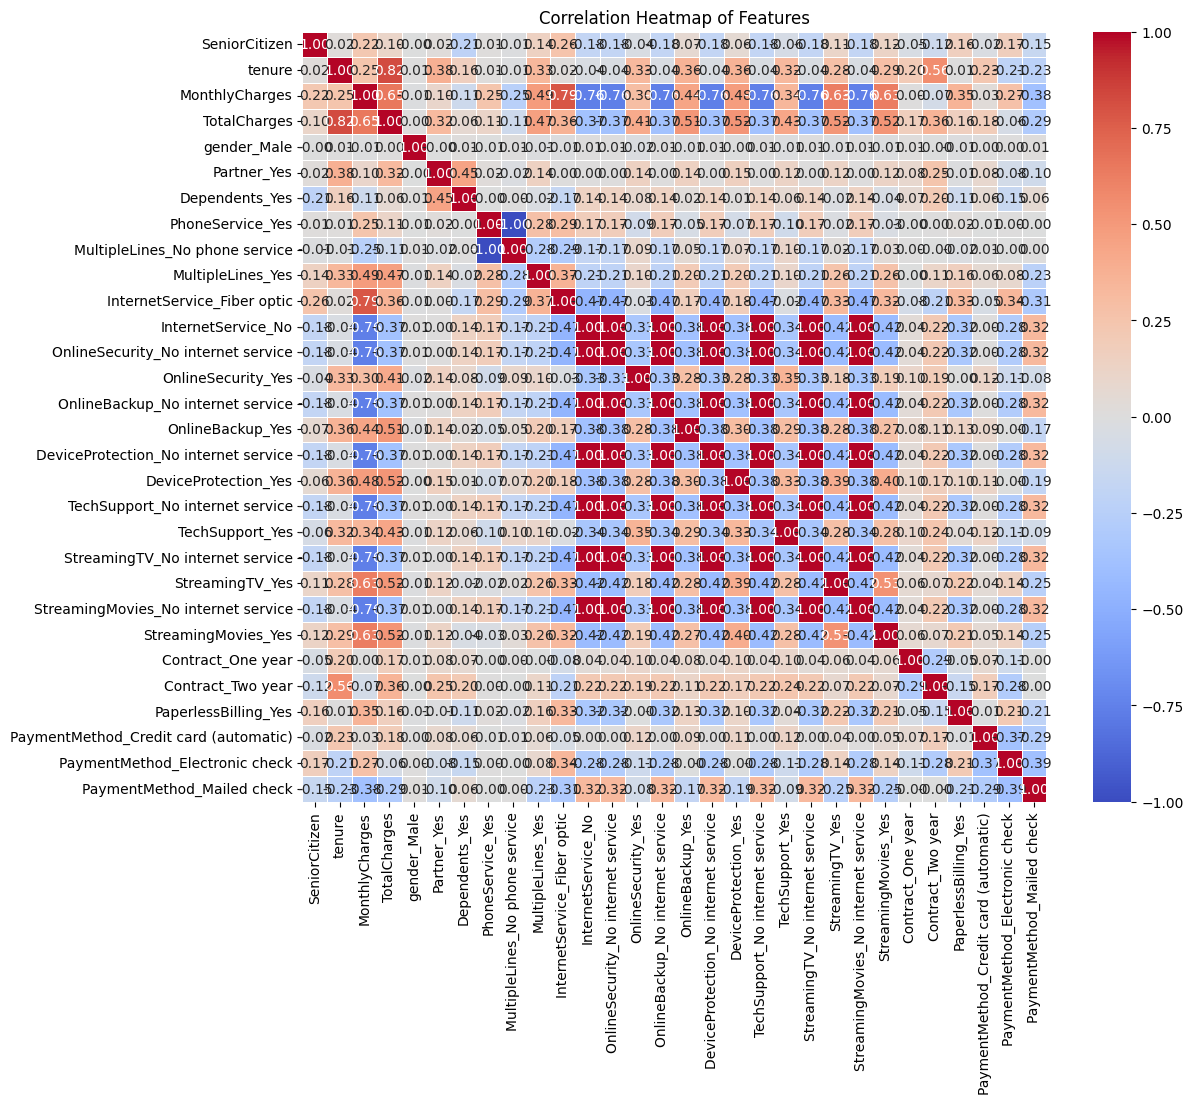

c:\Users\larin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


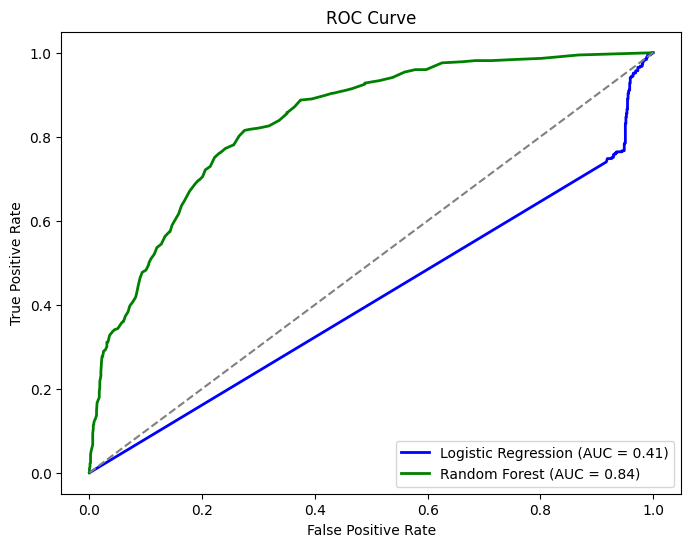

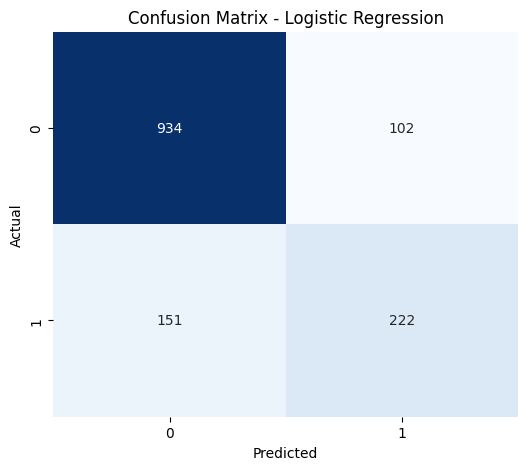

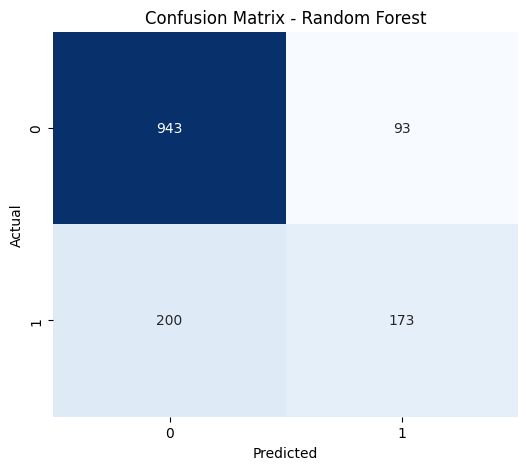

In [50]:
# Distribution of Churn bargraph
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn (Yes/No)')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Heatmap of correlations
corr_matrix = df_encoded.drop(columns=['Churn_Yes']).corr() # Dropping Churn_Yest to calculate correlation matrix

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5) 
plt.title('Correlation Heatmap of Features')
plt.show()

# ROC Curve Calculation and Plotting
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1]) # R0C curve data for lr
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg) # AUC calculation for lr

fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1]) # ROC curve for rf
roc_auc_rf = auc(fpr_rf, tpr_rf) # AUC calculation for rf

plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') # Plotting style/formatting
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Heatmap visual for lr confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', cbar=False) 
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Heatmap for rf confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [51]:
# Identify Categorical and Numerical Columns
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['int64','float64']).columns

# Encode Categorical Variables
for col in cat_cols:
    df[col] = df[col].astype('category').cat.codes

df = pd.get_dummies(df, drop_first=True) # One-hot encode remaining categorical features

df[num_cols] = scaler.fit_transform(df[num_cols]) # Standardize numerical columns using StandardScaler

In [52]:
X = df.drop(columns=['Churn']) # Define feature variables
y = df['Churn'] # Define target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #spilt test and train data

In [ ]:
#Initialize MLP Classifier
clf = MLPClassifier(hidden_layer_sizes=(10, 10),
                    activation='logistic', 
                    solver='lbfgs', max_iter=5000,
                    random_state=1)

clf.fit(X_train, y_train) # Fit the model to the training data
y_pred = clf.predict(X_test) # Make predictions on the test set

Confusion Matrix:
 [[863 173]
 [114 259]]
classification_report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.86      1036
           1       0.60      0.69      0.64       373

    accuracy                           0.80      1409
   macro avg       0.74      0.76      0.75      1409
weighted avg       0.81      0.80      0.80      1409

Accuracy:  0.7963094393186657


Text(45.722222222222214, 0.5, 'Actual')

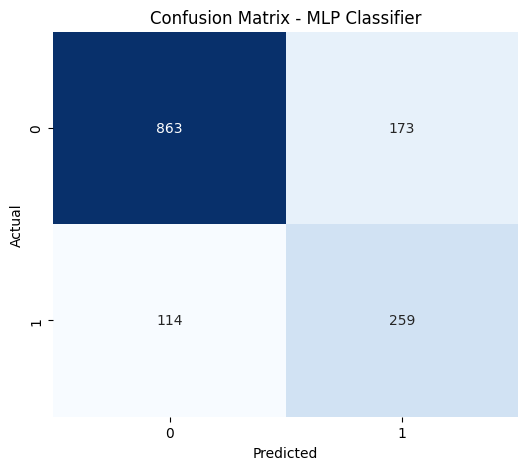

In [54]:
# Evaluate the Model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("classification_report:")
print(classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))

# Confusion Matrix
confusion_matrix_mlpc = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix_mlpc, annot=True, fmt='d', cmap='Blues', cbar=False) 
plt.title('Confusion Matrix - MLP Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Confusion Matrix:
 [[842 194]
 [190 183]]
classification_report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1036
           1       0.49      0.49      0.49       373

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409

Accuracy: 0.7274662881476224


Text(45.722222222222214, 0.5, 'Actual')

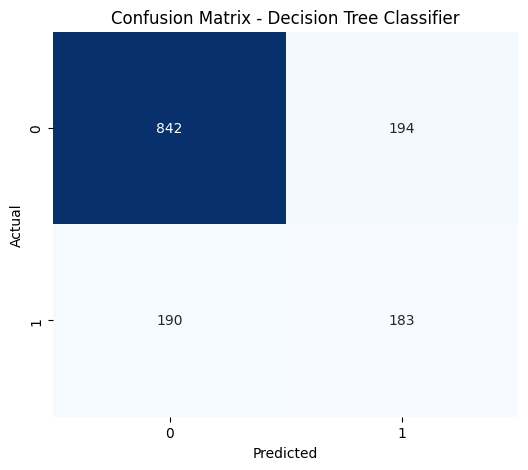

In [55]:
# Decision Tree Classifier
DTC = DecisionTreeClassifier(random_state=42) 
DTC.fit(X_train, y_train) 
y_pred_DTC = DTC.predict(X_test) 

# Evaluate the Model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_DTC)) 
print("classification_report:")
print(classification_report(y_test, y_pred_DTC)) 
print("Accuracy:", accuracy_score(y_test, y_pred_DTC)) 

# Confusion Matrix
confusion_matrix_DTC = confusion_matrix(y_test, y_pred_DTC)

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix_DTC, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Confusion Matrix:
 [[913 123]
 [298  75]]
classification_report:
              precision    recall  f1-score   support

           0       0.75      0.88      0.81      1036
           1       0.38      0.20      0.26       373

    accuracy                           0.70      1409
   macro avg       0.57      0.54      0.54      1409
weighted avg       0.65      0.70      0.67      1409

Accuracy: 0.7012065294535131


Text(45.722222222222214, 0.5, 'Actual')

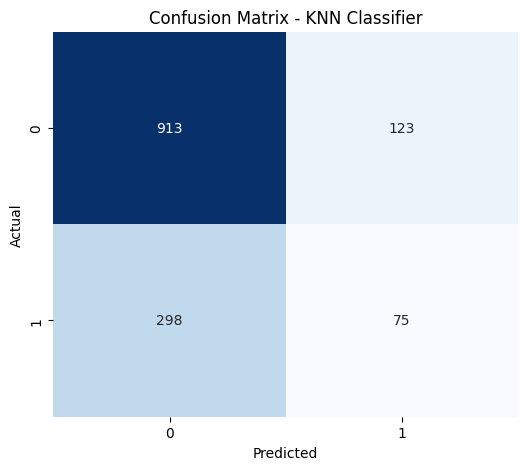

In [56]:
# K-Nearest Neighbors (KNN) Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluate the Model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("classification_report:")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn)) 

# Confusion Matrix
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - KNN Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')

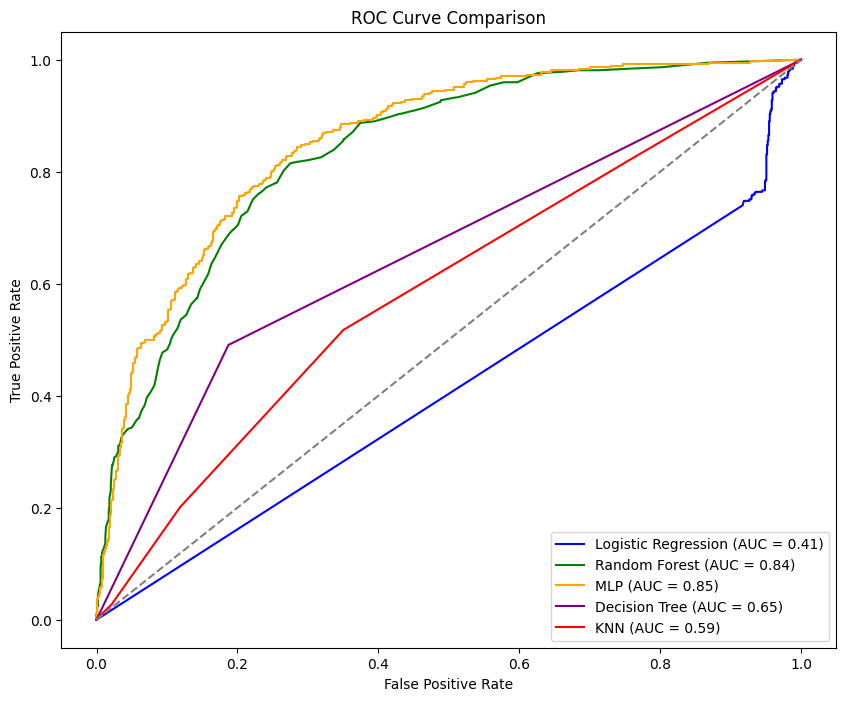

In [59]:
# Calculate ROC AUC for all models
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn.predict_proba(X_test)[:, 1]) # KNN
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_clf, tpr_clf, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1]) # MLP (clf)
roc_auc_clf = auc(fpr_clf, tpr_clf)

fpr_dtc, tpr_dtc, _ = roc_curve(y_test, DTC.predict_proba(X_test)[:, 1]) # Decision Tree
roc_auc_dtc = auc(fpr_dtc, tpr_dtc)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})', color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='green')
plt.plot(fpr_clf, tpr_clf, label=f'MLP (AUC = {roc_auc_clf:.2f})', color='orange')
plt.plot(fpr_dtc, tpr_dtc, label=f'Decision Tree (AUC = {roc_auc_dtc:.2f})', color='purple')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})', color='red')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()